In [1]:
import pandas as pd
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import warnings
import files

from sklearn.ensemble import (
    RandomForestClassifier, 
    GradientBoostingClassifier,
    StackingClassifier,
    VotingClassifier
)
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedGroupKFold, RandomizedSearchCV, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    classification_report,
    roc_auc_score,
    roc_curve,
    confusion_matrix,
    ConfusionMatrixDisplay,
    precision_recall_curve,
    average_precision_score
)

# Try to import LightGBM (may not be available in this environment)
try:
    import lightgbm as lgb
    LGBM_AVAILABLE = True
except ImportError:
    print("LightGBM not available, skipping this model")
    LGBM_AVAILABLE = False


Dataset shape: (219, 6)
Number of features: 6
Class distribution: [181  38]
Unique subjects: 219

RANDOM FOREST CLASSIFIER
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best RF parameters: {'rf__n_estimators': 50, 'rf__min_samples_split': 5, 'rf__min_samples_leaf': 2, 'rf__max_features': 0.75, 'rf__max_depth': 5}
Best CV ROC AUC: 0.5840
Saved random_forest to models/random_forest.pkl

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.99      0.90       181
           1       0.00      0.00      0.00        38

    accuracy                           0.82       219
   macro avg       0.41      0.50      0.45       219
weighted avg       0.68      0.82      0.75       219

Random Forest ROC AUC: 0.5961


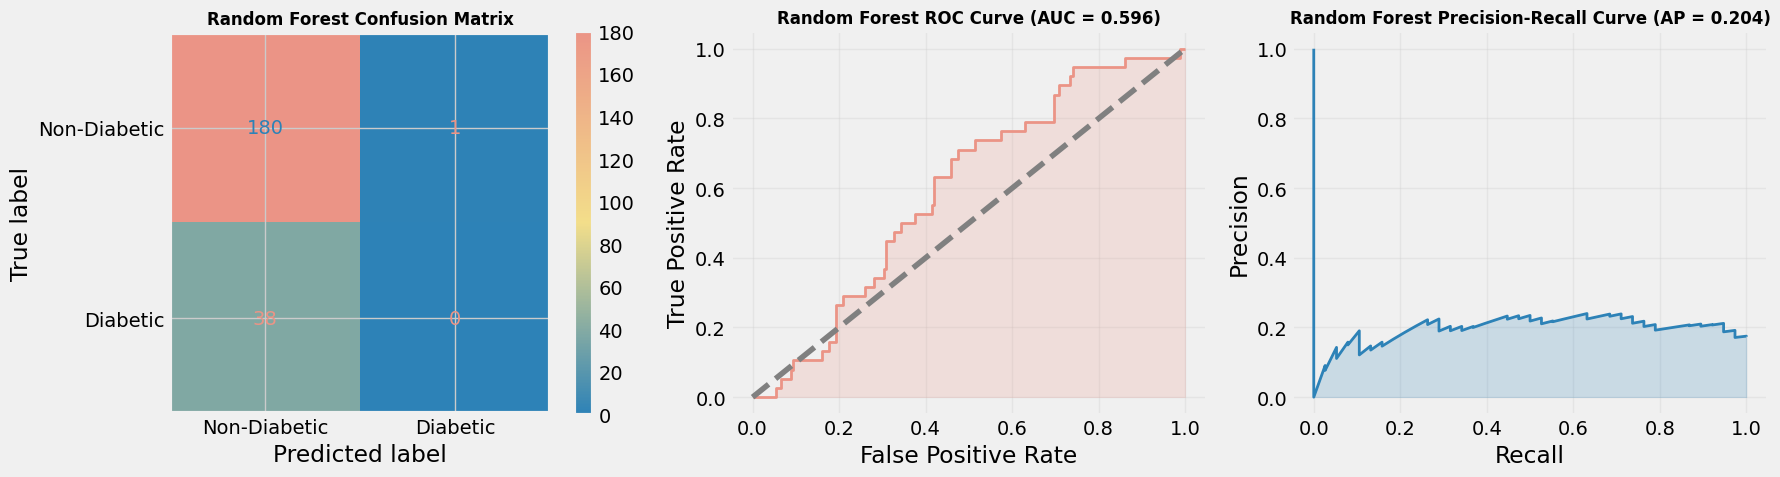


SUPPORT VECTOR MACHINE
Fitting 5 folds for each of 12 candidates, totalling 60 fits


d:\trash)stuff\PPG_BLOOD_GLUCOSE\JB_implementation\JB\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 12 is smaller than n_iter=50. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best SVM parameters: {'svm__kernel': 'rbf', 'svm__gamma': 0.1, 'svm__C': 10}
Best CV ROC AUC: 0.5570
Saved svm to models/svm.pkl


d:\trash)stuff\PPG_BLOOD_GLUCOSE\JB_implementation\JB\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\trash)stuff\PPG_BLOOD_GLUCOSE\JB_implementation\JB\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\trash)stuff\PPG_BLOOD_GLUCOSE\JB_implementation\JB\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif


SVM Classification Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91       181
           1       0.00      0.00      0.00        38

    accuracy                           0.83       219
   macro avg       0.41      0.50      0.45       219
weighted avg       0.68      0.83      0.75       219

SVM ROC AUC: 0.4069


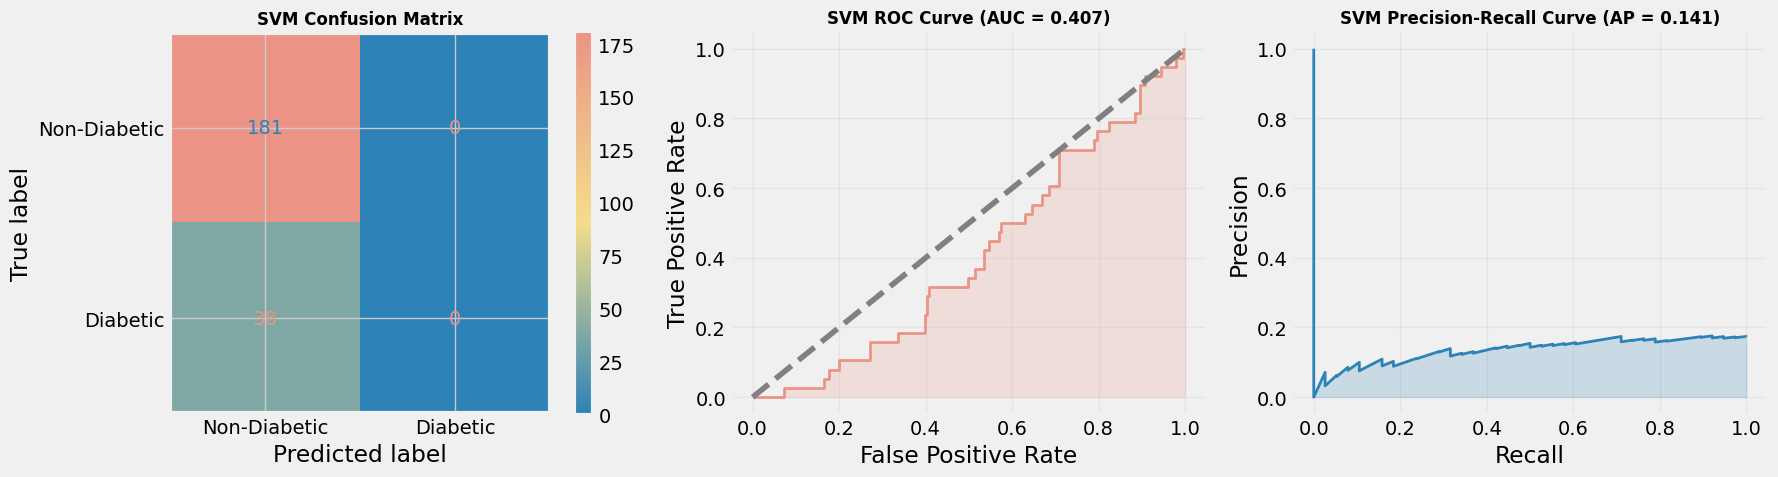


GRADIENT BOOSTING CLASSIFIER
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best GB parameters: {'gb__subsample': 1.0, 'gb__n_estimators': 50, 'gb__min_samples_split': 10, 'gb__min_samples_leaf': 2, 'gb__max_depth': 3, 'gb__learning_rate': 0.05}
Best CV ROC AUC: 0.5679
Saved gradient_boosting to models/gradient_boosting.pkl

Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.98      0.90       181
           1       0.33      0.05      0.09        38

    accuracy                           0.82       219
   macro avg       0.58      0.52      0.49       219
weighted avg       0.74      0.82      0.76       219

Gradient Boosting ROC AUC: 0.5756


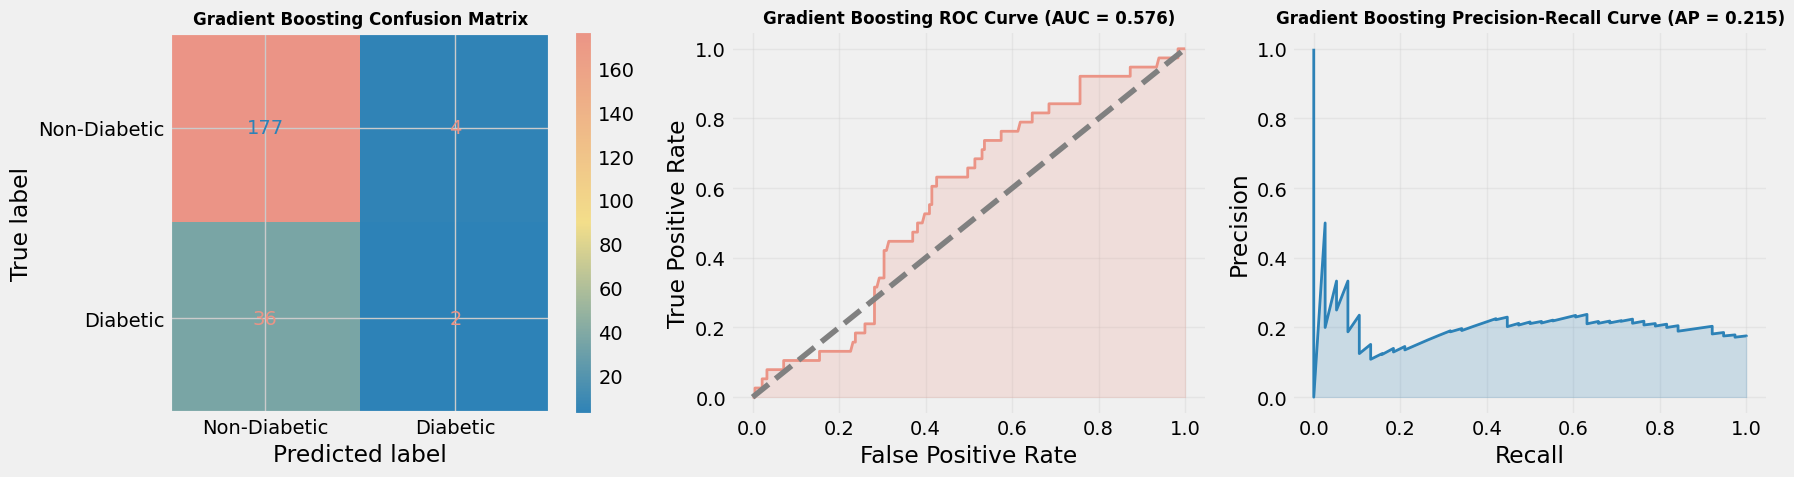


LIGHTGBM CLASSIFIER
Fitting 5 folds for each of 50 candidates, totalling 250 fits
[LightGBM] [Info] Number of positive: 38, number of negative: 181
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000102 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 297
[LightGBM] [Info] Number of data points in the train set: 219, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.173516 -> initscore=-1.560911
[LightGBM] [Info] Start training from score -1.560911
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

d:\trash)stuff\PPG_BLOOD_GLUCOSE\JB_implementation\JB\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\trash)stuff\PPG_BLOOD_GLUCOSE\JB_implementation\JB\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\trash)stuff\PPG_BLOOD_GLUCOSE\JB_implementation\JB\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

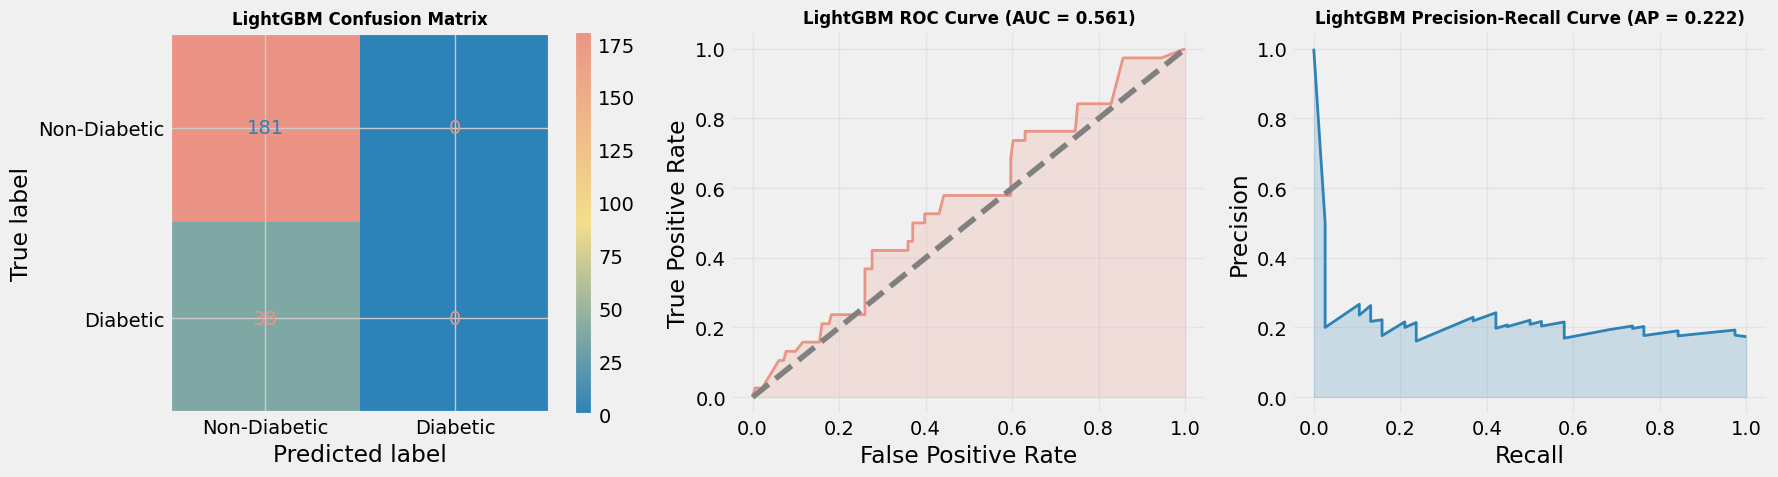


STACKING CLASSIFIER
Saved stacking_classifier to models/stacking_classifier.pkl

Stacking Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.97      0.90       181
           1       0.44      0.11      0.17        38

    accuracy                           0.82       219
   macro avg       0.64      0.54      0.54       219
weighted avg       0.77      0.82      0.77       219

Stacking Classifier ROC AUC: 0.6527


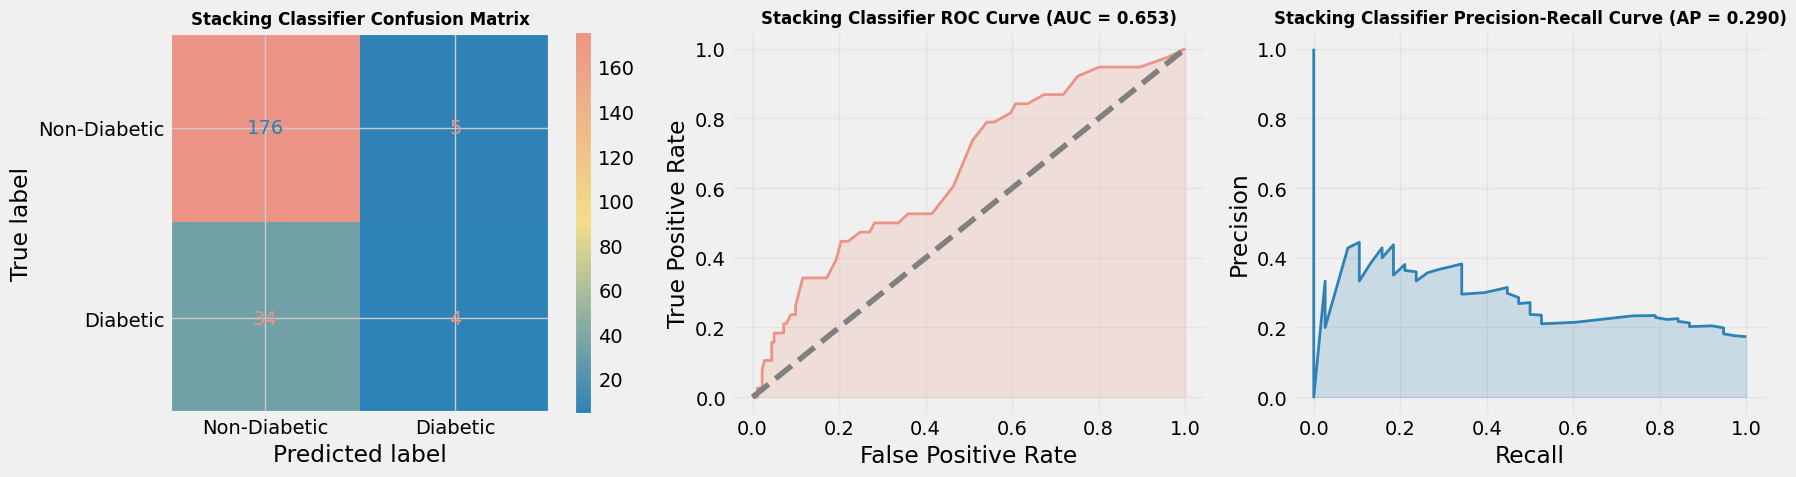


VOTING CLASSIFIER
Saved voting_classifier to models/voting_classifier.pkl

Voting Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.99      0.90       181
           1       0.00      0.00      0.00        38

    accuracy                           0.82       219
   macro avg       0.41      0.50      0.45       219
weighted avg       0.68      0.82      0.75       219

Voting Classifier ROC AUC: 0.5000


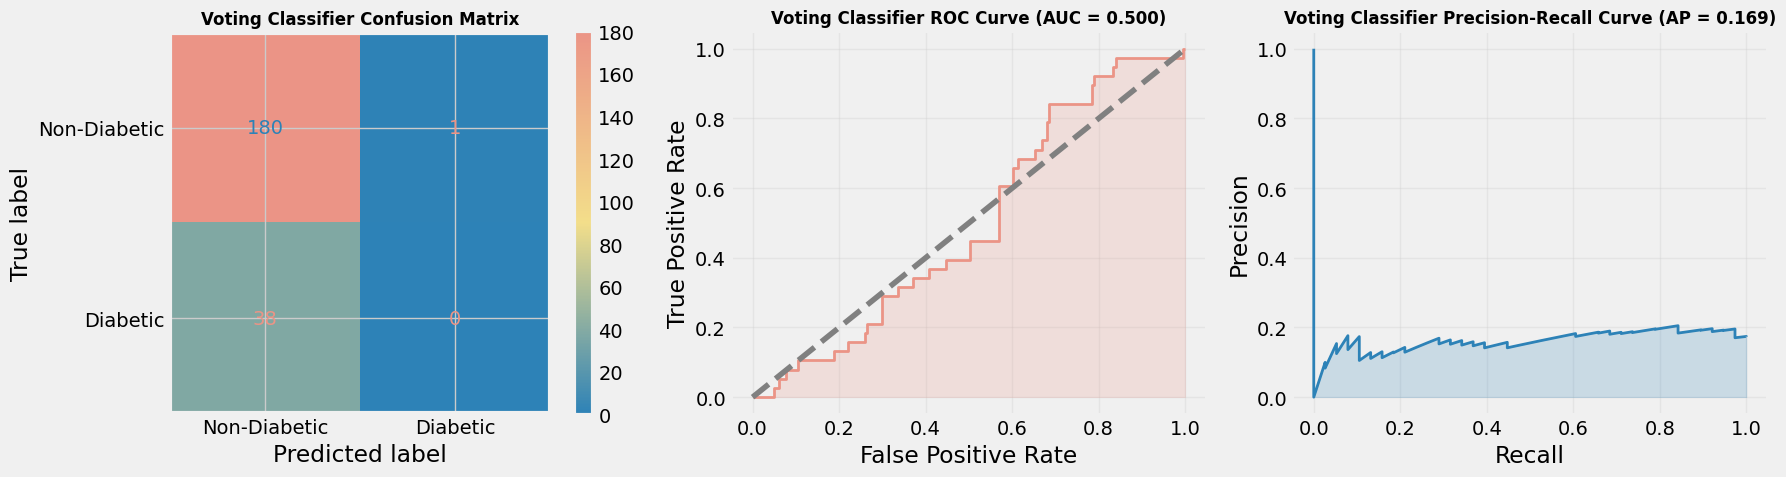


MODEL COMPARISON


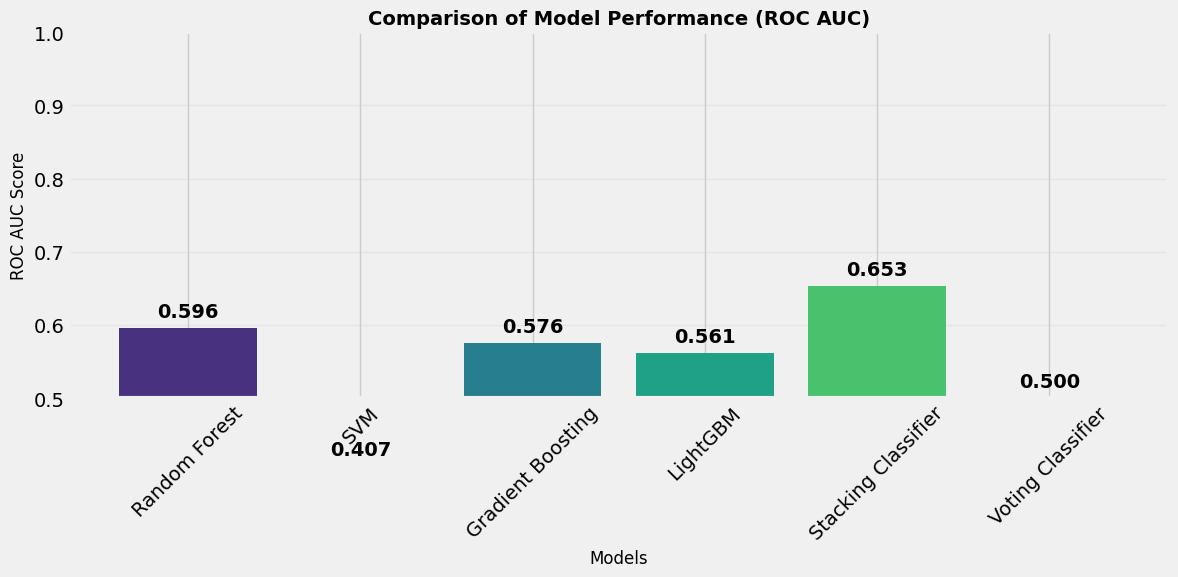

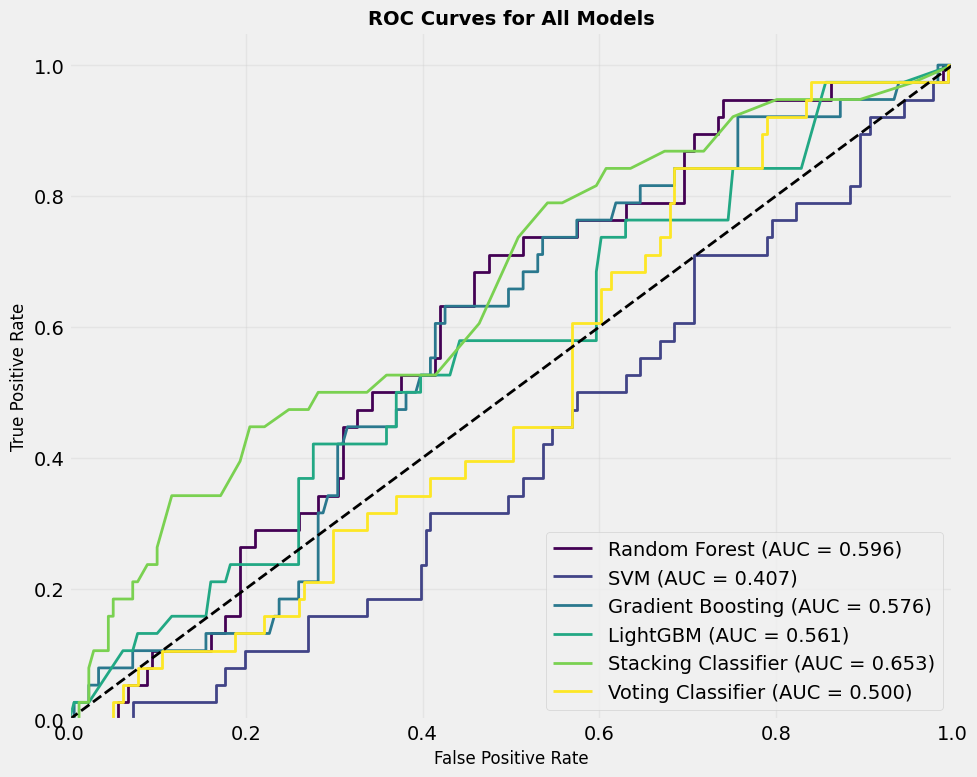


Completed multi-model evaluation with ensemble methods!


In [2]:
# Create an output directory for models
if not os.path.exists('models'):
    os.makedirs('models')

# Set up custom color palettes for visualizations
custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', ['#2D82B7', '#F3DE8A', '#EB9486'])
plt.style.use('fivethirtyeight')
sns.set_palette('viridis')

# Function to save model and predictions
def save_model(model, model_name):
    try:
        with open(f'models/{model_name}.pkl', 'wb') as f:
            pickle.dump(model, f)
        print(f"Saved {model_name} to models/{model_name}.pkl")
    except Exception as e:
        print(f"Warning: Could not save {model_name} due to: {str(e)}")
        print("Continuing without saving this model...")

# Function to evaluate and visualize model results
def evaluate_model(model, X, y, groups, cv, model_name):
    # Cross-validated predictions & probabilities
    y_pred = cross_val_predict(
        model, X, y,
        cv=cv.split(X, y, groups),
        method="predict",
        n_jobs=-1
    )
    y_proba = cross_val_predict(
        model, X, y,
        cv=cv.split(X, y, groups),
        method="predict_proba",
        n_jobs=-1
    )[:, 1]  # probability of class "1"
    
    # Classification report
    print(f"\n{model_name} Classification Report:\n", classification_report(y, y_pred))
    
    # ROC AUC
    auc = roc_auc_score(y, y_proba)
    print(f"{model_name} ROC AUC: {auc:.4f}")
    
    # Create a figure with 3 subplots
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    # Plot confusion matrix
    cm = confusion_matrix(y, y_pred)
    disp = ConfusionMatrixDisplay(cm, display_labels=['Non-Diabetic', 'Diabetic'])
    disp.plot(cmap=custom_cmap, ax=axes[0], values_format='d')
    axes[0].set_title(f"{model_name} Confusion Matrix", fontsize=12, fontweight='bold')
    
    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y, y_proba)
    axes[1].plot(fpr, tpr, linewidth=2, color='#EB9486')
    axes[1].plot([0,1], [0,1], linestyle="--", color='gray')
    axes[1].fill_between(fpr, tpr, alpha=0.2, color='#EB9486')
    axes[1].set_xlabel("False Positive Rate")
    axes[1].set_ylabel("True Positive Rate")
    axes[1].set_title(f"{model_name} ROC Curve (AUC = {auc:.3f})", fontsize=12, fontweight='bold')
    axes[1].grid(True, alpha=0.3)
    
    # Plot Precision-Recall curve
    precision, recall, _ = precision_recall_curve(y, y_proba)
    avg_precision = average_precision_score(y, y_proba)
    axes[2].plot(recall, precision, linewidth=2, color='#2D82B7')
    axes[2].fill_between(recall, precision, alpha=0.2, color='#2D82B7')
    axes[2].set_xlabel("Recall")
    axes[2].set_ylabel("Precision")
    axes[2].set_title(f"{model_name} Precision-Recall Curve (AP = {avg_precision:.3f})", 
                      fontsize=12, fontweight='bold')
    axes[2].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return y_pred, y_proba, auc

# 1) Load feature & metadata CSVs
feat_df = pd.read_csv(files.PPG_MY_OWN)
meta_df = pd.read_csv(files.METADATA_PATH)

# 2) Merge on subject_ID
df = feat_df.merge(
    meta_df[['subject_ID', 'diabetes_label']],
    on="subject_ID",
    how="inner"
)

# 3) Define X, y, and group IDs
FEATURE_COLS = [c for c in df.columns if c not in ["subject_ID", "diabetes_label"]]
X = df[FEATURE_COLS].values
y = df["diabetes_label"].values
groups = df["subject_ID"].values

# Print dataset info
print(f"Dataset shape: {X.shape}")
print(f"Number of features: {len(FEATURE_COLS)}")
print(f"Class distribution: {np.bincount(y)}")
print(f"Unique subjects: {len(np.unique(groups))}")

# 4) Subject-wise stratified CV
cv = StratifiedGroupKFold(n_splits=5, shuffle=True, random_state=42)

# 5) Dictionary to store results
model_results = {}

# 6) Random Forest Classifier
print("\n" + "="*50)
print("RANDOM FOREST CLASSIFIER")
print("="*50)

rf_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("rf", RandomForestClassifier(random_state=42))
])

rf_param_dist = {
    "rf__n_estimators": [50, 100, 200, 300],
    "rf__max_depth": [None, 5, 10, 20],
    "rf__min_samples_split": [2, 5, 10],
    "rf__min_samples_leaf": [1, 2, 4],
    "rf__max_features": ["sqrt", "log2", 0.5, 0.75]
}

rf_search = RandomizedSearchCV(
    estimator=rf_pipeline,
    param_distributions=rf_param_dist,
    n_iter=50,  # Increased from 30 to 50
    scoring="roc_auc",  # Using ROC AUC instead of accuracy
    cv=cv.split(X, y, groups),
    n_jobs=-1,
    verbose=1,
    random_state=42
)
rf_search.fit(X, y)

print("Best RF parameters:", rf_search.best_params_)
print(f"Best CV ROC AUC: {rf_search.best_score_:.4f}")

# Save the model
save_model(rf_search.best_estimator_, "random_forest")

# Evaluate RF
rf_pred, rf_proba, rf_auc = evaluate_model(
    rf_search.best_estimator_, X, y, groups, cv, "Random Forest"
)
model_results["Random Forest"] = {
    "model": rf_search.best_estimator_,
    "auc": rf_auc,
    "y_pred": rf_pred,
    "y_proba": rf_proba
}

# 7) Support Vector Machine
print("\n" + "="*50)
print("SUPPORT VECTOR MACHINE")
print("="*50)

svm_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(random_state=42, probability=True))
])

svm_param_dist = {
    "svm__C": [1, 10],
    "svm__gamma": ["scale", 0.1],
    "svm__kernel": ["rbf", "poly", "sigmoid"]
}

svm_search = RandomizedSearchCV(
    estimator=svm_pipeline,
    param_distributions=svm_param_dist,
    n_iter=50,  # Increased from 20 to 50
    scoring="roc_auc",
    cv=cv.split(X, y, groups),
    n_jobs=-1,
    verbose=1,
    random_state=42
)
svm_search.fit(X, y)

print("Best SVM parameters:", svm_search.best_params_)
print(f"Best CV ROC AUC: {svm_search.best_score_:.4f}")

# Save the model
save_model(svm_search.best_estimator_, "svm")

# Evaluate SVM
svm_pred, svm_proba, svm_auc = evaluate_model(
    svm_search.best_estimator_, X, y, groups, cv, "SVM"
)
model_results["SVM"] = {
    "model": svm_search.best_estimator_,
    "auc": svm_auc,
    "y_pred": svm_pred,
    "y_proba": svm_proba
}

# 8) Gradient Boosting Classifier
print("\n" + "="*50)
print("GRADIENT BOOSTING CLASSIFIER")
print("="*50)

gb_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("gb", GradientBoostingClassifier(random_state=42))
])

gb_param_dist = {
    "gb__n_estimators": [50, 100, 200, 300],
    "gb__learning_rate": [0.01, 0.05, 0.1, 0.2],
    "gb__max_depth": [3, 5, 7, 9],
    "gb__min_samples_split": [2, 5, 10],
    "gb__min_samples_leaf": [1, 2, 4],
    "gb__subsample": [0.8, 0.9, 1.0]
}

gb_search = RandomizedSearchCV(
    estimator=gb_pipeline,
    param_distributions=gb_param_dist,
    n_iter=50,  # Increased from 30 to 50
    scoring="roc_auc",
    cv=cv.split(X, y, groups),
    n_jobs=-1,
    verbose=1,
    random_state=42
)
gb_search.fit(X, y)

print("Best GB parameters:", gb_search.best_params_)
print(f"Best CV ROC AUC: {gb_search.best_score_:.4f}")

# Save the model
save_model(gb_search.best_estimator_, "gradient_boosting")

# Evaluate GB
gb_pred, gb_proba, gb_auc = evaluate_model(
    gb_search.best_estimator_, X, y, groups, cv, "Gradient Boosting"
)
model_results["Gradient Boosting"] = {
    "model": gb_search.best_estimator_,
    "auc": gb_auc,
    "y_pred": gb_pred,
    "y_proba": gb_proba
}

# 9) LightGBM
if LGBM_AVAILABLE:
    print("\n" + "="*50)
    print("LIGHTGBM CLASSIFIER")
    print("="*50)
    
    # Create a LightGBM classifier that will use feature names correctly
    lgbm_classifier = lgb.LGBMClassifier(random_state=42)
    
    # We'll need to pass feature names to avoid warnings
    lgbm_pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("lgbm", lgbm_classifier)
    ])
    
    lgbm_param_dist = {
        "lgbm__n_estimators": [50, 100, 200, 300],
        "lgbm__learning_rate": [0.01, 0.05, 0.1, 0.2],
        "lgbm__max_depth": [3, 5, 7, 9, -1],
        "lgbm__num_leaves": [31, 50, 100, 150],
        "lgbm__min_child_samples": [10, 20, 30],
        "lgbm__subsample": [0.8, 0.9, 1.0],
        "lgbm__colsample_bytree": [0.8, 0.9, 1.0]
    }
    
    lgbm_search = RandomizedSearchCV(
        estimator=lgbm_pipeline,
        param_distributions=lgbm_param_dist,
        n_iter=50,
        scoring="roc_auc",
        cv=cv.split(X, y, groups),
        n_jobs=-1,
        verbose=1,
        random_state=42
    )
    
    # Silence the feature names warning
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        lgbm_search.fit(X, y, lgbm__feature_name=FEATURE_COLS)
    
    print("Best LGBM parameters:", lgbm_search.best_params_)
    print(f"Best CV ROC AUC: {lgbm_search.best_score_:.4f}")
    
    # Save the model
    save_model(lgbm_search.best_estimator_, "lightgbm")
    
    # Evaluate LGBM with manual cross-validation to avoid issues
    lgbm_pred_list = []
    lgbm_proba_list = []
    cv_splits = list(cv.split(X, y, groups))  # Convert generator to list for reuse
    
    for train_idx, test_idx in cv_splits:
        # Train on training fold
        X_train, X_test = X[train_idx], X[test_idx]
        y_train = y[train_idx]
        
        # Scale data
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        # Create and train a new LightGBM model for this fold
        fold_lgbm = lgb.LGBMClassifier(
            random_state=42,
            **{k.replace('lgbm__', ''): v for k, v in lgbm_search.best_params_.items() if k.startswith('lgbm__')}
        )
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            fold_lgbm.fit(X_train_scaled, y_train, feature_name=FEATURE_COLS)
        
        # Predict and store results
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            lgbm_pred_list.append(fold_lgbm.predict(X_test_scaled))
            lgbm_proba_list.append(fold_lgbm.predict_proba(X_test_scaled)[:, 1])
    
    # Combine predictions from all folds
    lgbm_pred = np.concatenate(lgbm_pred_list)
    lgbm_proba = np.concatenate(lgbm_proba_list)
    
    # Calculate metrics
    print("\nLightGBM Classification Report:\n", classification_report(y, lgbm_pred))
    lgbm_auc = roc_auc_score(y, lgbm_proba)
    print(f"LightGBM ROC AUC: {lgbm_auc:.4f}")
    
    # Create visualization for LGBM
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    # Plot confusion matrix
    cm = confusion_matrix(y, lgbm_pred)
    disp = ConfusionMatrixDisplay(cm, display_labels=['Non-Diabetic', 'Diabetic'])
    disp.plot(cmap=custom_cmap, ax=axes[0], values_format='d')
    axes[0].set_title("LightGBM Confusion Matrix", fontsize=12, fontweight='bold')
    
    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y, lgbm_proba)
    axes[1].plot(fpr, tpr, linewidth=2, color='#EB9486')
    axes[1].plot([0,1], [0,1], linestyle="--", color='gray')
    axes[1].fill_between(fpr, tpr, alpha=0.2, color='#EB9486')
    axes[1].set_xlabel("False Positive Rate")
    axes[1].set_ylabel("True Positive Rate")
    axes[1].set_title(f"LightGBM ROC Curve (AUC = {lgbm_auc:.3f})", fontsize=12, fontweight='bold')
    axes[1].grid(True, alpha=0.3)
    
    # Plot Precision-Recall curve
    precision, recall, _ = precision_recall_curve(y, lgbm_proba)
    avg_precision = average_precision_score(y, lgbm_proba)
    axes[2].plot(recall, precision, linewidth=2, color='#2D82B7')
    axes[2].fill_between(recall, precision, alpha=0.2, color='#2D82B7')
    axes[2].set_xlabel("Recall")
    axes[2].set_ylabel("Precision")
    axes[2].set_title(f"LightGBM Precision-Recall Curve (AP = {avg_precision:.3f})", 
                      fontsize=12, fontweight='bold')
    axes[2].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    model_results["LightGBM"] = {
        "model": lgbm_search.best_estimator_,
        "auc": lgbm_auc,
        "y_pred": lgbm_pred,
        "y_proba": lgbm_proba
    }
# 10) Stacking Classifier with explicit naming to avoid pickling issues
print("\n" + "="*50)
print("STACKING CLASSIFIER")
print("="*50)

# Define base estimators - use simpler components to avoid pickling issues
base_estimators = [
    ('rf', RandomForestClassifier(**{k.replace('rf__', ''): v for k, v in rf_search.best_params_.items() if k.startswith('rf__')})),
    ('svm', SVC(probability=True, **{k.replace('svm__', ''): v for k, v in svm_search.best_params_.items() if k.startswith('svm__')})),
    ('gb', GradientBoostingClassifier(**{k.replace('gb__', ''): v for k, v in gb_search.best_params_.items() if k.startswith('gb__')}))
]

# Don't add LGBM to avoid feature name issues
# Create a simpler stacking classifier to avoid pickle errors
stack_clf = StackingClassifier(
    estimators=base_estimators,
    final_estimator=RandomForestClassifier(n_estimators=100, random_state=42),
    cv=5,  # Use regular number rather than the cv split generator
    n_jobs=-1
)

# Scale the features using the same scaler as before
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit stacking classifier on scaled data
stack_clf.fit(X_scaled, y)

# Save the model with error handling
save_model(stack_clf, "stacking_classifier")

# Create custom cross_val_predict for stacking 
def stack_predict(clf, X_data):
    X_scaled = scaler.transform(X_data)
    return clf.predict(X_scaled)

def stack_predict_proba(clf, X_data):
    X_scaled = scaler.transform(X_data)
    return clf.predict_proba(X_scaled)

# Evaluate stacking classifier with manual cross-validation to avoid issues
stack_pred_list = []
stack_proba_list = []

for train_idx, test_idx in cv.split(X, y, groups):
    # Train on training fold
    X_train, X_test = X[train_idx], X[test_idx]
    y_train = y[train_idx]
    
    # Scale data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Create and train a new stacking model for this fold
    fold_stack = StackingClassifier(
        estimators=base_estimators,
        final_estimator=RandomForestClassifier(n_estimators=100, random_state=42),
        cv=5,
        n_jobs=-1
    )
    fold_stack.fit(X_train_scaled, y_train)
    
    # Predict and store results
    stack_pred_list.append(fold_stack.predict(X_test_scaled))
    stack_proba_list.append(fold_stack.predict_proba(X_test_scaled)[:, 1])

# Combine predictions from all folds
stack_pred = np.concatenate(stack_pred_list)
stack_proba = np.concatenate(stack_proba_list)

# Calculate metrics
print("\nStacking Classifier Classification Report:\n", classification_report(y, stack_pred))
stack_auc = roc_auc_score(y, stack_proba)
print(f"Stacking Classifier ROC AUC: {stack_auc:.4f}")

# Create visualization for Stacking Classifier
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot confusion matrix
cm = confusion_matrix(y, stack_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=['Non-Diabetic', 'Diabetic'])
disp.plot(cmap=custom_cmap, ax=axes[0], values_format='d')
axes[0].set_title("Stacking Classifier Confusion Matrix", fontsize=12, fontweight='bold')

# Plot ROC curve
fpr, tpr, _ = roc_curve(y, stack_proba)
axes[1].plot(fpr, tpr, linewidth=2, color='#EB9486')
axes[1].plot([0,1], [0,1], linestyle="--", color='gray')
axes[1].fill_between(fpr, tpr, alpha=0.2, color='#EB9486')
axes[1].set_xlabel("False Positive Rate")
axes[1].set_ylabel("True Positive Rate")
axes[1].set_title(f"Stacking Classifier ROC Curve (AUC = {stack_auc:.3f})", fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)

# Plot Precision-Recall curve
precision, recall, _ = precision_recall_curve(y, stack_proba)
avg_precision = average_precision_score(y, stack_proba)
axes[2].plot(recall, precision, linewidth=2, color='#2D82B7')
axes[2].fill_between(recall, precision, alpha=0.2, color='#2D82B7')
axes[2].set_xlabel("Recall")
axes[2].set_ylabel("Precision")
axes[2].set_title(f"Stacking Classifier Precision-Recall Curve (AP = {avg_precision:.3f})", 
                fontsize=12, fontweight='bold')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

model_results["Stacking Classifier"] = {
    "model": stack_clf,
    "auc": stack_auc,
    "y_pred": stack_pred,
    "y_proba": stack_proba
}

# 11) Voting Classifier with explicit scaling
print("\n" + "="*50)
print("VOTING CLASSIFIER")
print("="*50)

# Create simpler base estimators without pipelines
base_estimators = [
    ('rf', RandomForestClassifier(**{k.replace('rf__', ''): v for k, v in rf_search.best_params_.items() if k.startswith('rf__')})),
    ('svm', SVC(probability=True, **{k.replace('svm__', ''): v for k, v in svm_search.best_params_.items() if k.startswith('svm__')})),
    ('gb', GradientBoostingClassifier(**{k.replace('gb__', ''): v for k, v in gb_search.best_params_.items() if k.startswith('gb__')}))
]

# Create voting classifier
vote_clf = VotingClassifier(
    estimators=base_estimators,
    voting='soft',
    n_jobs=-1
)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit voting classifier on scaled data
vote_clf.fit(X_scaled, y)

# Save the model
save_model(vote_clf, "voting_classifier")

# Evaluate voting classifier with manual cross-validation
vote_pred_list = []
vote_proba_list = []

for train_idx, test_idx in cv.split(X, y, groups):
    # Train on training fold
    X_train, X_test = X[train_idx], X[test_idx]
    y_train = y[train_idx]
    
    # Scale data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Create and train a new voting model for this fold
    fold_vote = VotingClassifier(
        estimators=base_estimators,
        voting='soft',
        n_jobs=-1
    )
    fold_vote.fit(X_train_scaled, y_train)
    
    # Predict and store results
    vote_pred_list.append(fold_vote.predict(X_test_scaled))
    vote_proba_list.append(fold_vote.predict_proba(X_test_scaled)[:, 1])

# Combine predictions from all folds
vote_pred = np.concatenate(vote_pred_list)
vote_proba = np.concatenate(vote_proba_list)

# Calculate metrics
print("\nVoting Classifier Classification Report:\n", classification_report(y, vote_pred))
vote_auc = roc_auc_score(y, vote_proba)
print(f"Voting Classifier ROC AUC: {vote_auc:.4f}")

# Create visualization for Voting Classifier
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot confusion matrix
cm = confusion_matrix(y, vote_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=['Non-Diabetic', 'Diabetic'])
disp.plot(cmap=custom_cmap, ax=axes[0], values_format='d')
axes[0].set_title("Voting Classifier Confusion Matrix", fontsize=12, fontweight='bold')

# Plot ROC curve
fpr, tpr, _ = roc_curve(y, vote_proba)
axes[1].plot(fpr, tpr, linewidth=2, color='#EB9486')
axes[1].plot([0,1], [0,1], linestyle="--", color='gray')
axes[1].fill_between(fpr, tpr, alpha=0.2, color='#EB9486')
axes[1].set_xlabel("False Positive Rate")
axes[1].set_ylabel("True Positive Rate")
axes[1].set_title(f"Voting Classifier ROC Curve (AUC = {vote_auc:.3f})", fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)

# Plot Precision-Recall curve
precision, recall, _ = precision_recall_curve(y, vote_proba)
avg_precision = average_precision_score(y, vote_proba)
axes[2].plot(recall, precision, linewidth=2, color='#2D82B7')
axes[2].fill_between(recall, precision, alpha=0.2, color='#2D82B7')
axes[2].set_xlabel("Recall")
axes[2].set_ylabel("Precision")
axes[2].set_title(f"Voting Classifier Precision-Recall Curve (AP = {avg_precision:.3f})", 
                fontsize=12, fontweight='bold')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

model_results["Voting Classifier"] = {
    "model": vote_clf,
    "auc": vote_auc,
    "y_pred": vote_pred,
    "y_proba": vote_proba
}

# 12) Compare all models
print("\n" + "="*50)
print("MODEL COMPARISON")
print("="*50)

# Extract model names and AUC scores
model_names = list(model_results.keys())
auc_scores = [model_results[name]["auc"] for name in model_names]

# Create colorful comparison bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(model_names, auc_scores, color=sns.color_palette("viridis", len(model_names)))

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.3f}', ha='center', va='bottom', fontweight='bold')

plt.xlabel('Models', fontsize=12)
plt.ylabel('ROC AUC Score', fontsize=12)
plt.title('Comparison of Model Performance (ROC AUC)', fontsize=14, fontweight='bold')
plt.ylim(0.5, 1.0)  # Set y-axis to start at 0.5 for better visualization
plt.grid(True, axis='y', alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 13) Plot ROC curves for all models in one figure
plt.figure(figsize=(10, 8))

# Line colors for different models
colors = plt.cm.viridis(np.linspace(0, 1, len(model_names)))

for i, name in enumerate(model_names):
    # Get the false positive rate, true positive rate for this model
    y_true = y
    y_score = model_results[name]["y_proba"]
    fpr, tpr, _ = roc_curve(y_true, y_score)
    auc = model_results[name]["auc"]
    
    # Plot ROC curve
    plt.plot(fpr, tpr, color=colors[i], lw=2,
             label=f'{name} (AUC = {auc:.3f})')

# Plot diagonal line
plt.plot([0, 1], [0, 1], 'k--', lw=2)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves for All Models', fontsize=14, fontweight='bold')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 14) Feature importance analysis (using Random Forest as an example)
rf_model = model_results["Random Forest"]["model"].named_steps['rf']
feature_importances = rf_model.feature_importances_
sorted_idx = np.argsort(feature_importances)[::-1]
top_n = 15  # Show top 15 features

print("\nCompleted multi-model evaluation with ensemble methods!")